In [3]:
#dataloading and exploration
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [8]:
#load iris data sets
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head())
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

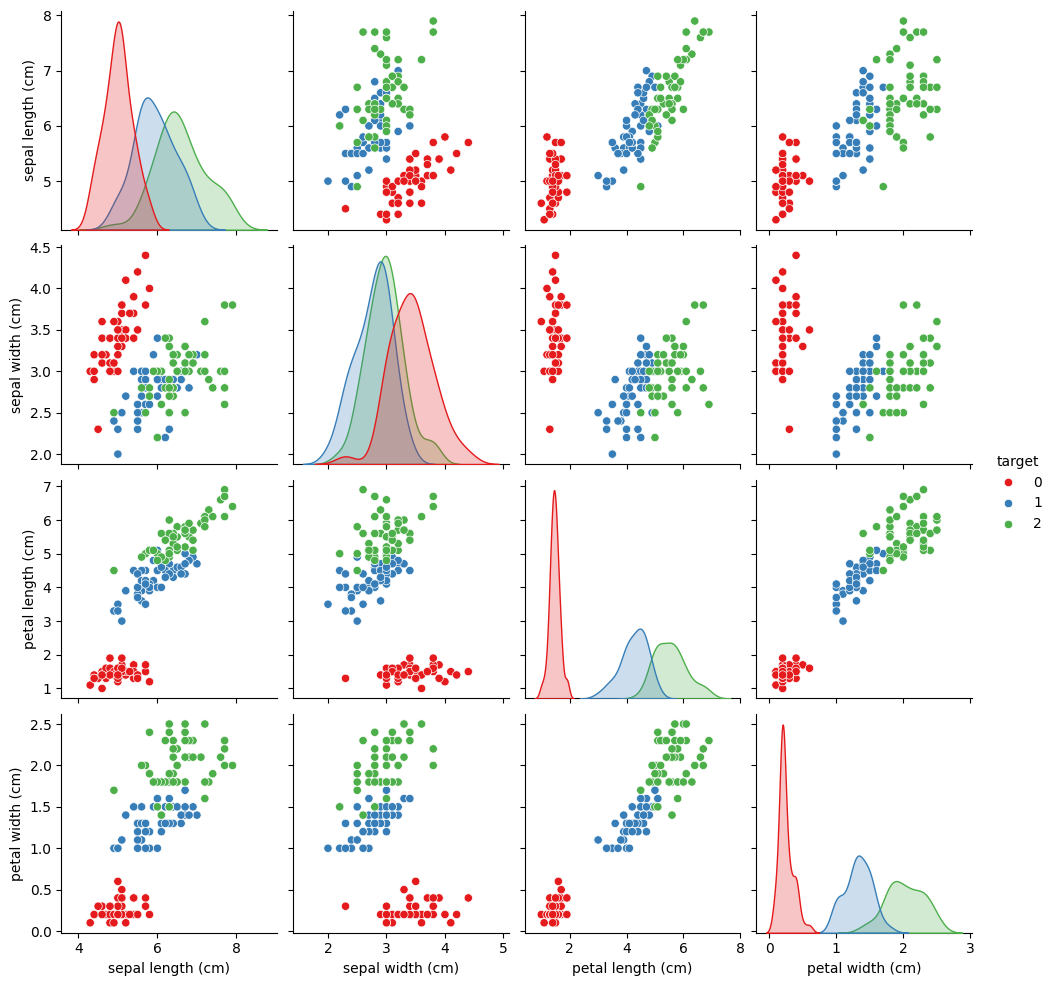

In [16]:
#vizualize the data
sns.pairplot(df,hue='target', palette="Set1")
plt.show()

In [19]:
#step2
#data cleaning and pre processing
from sklearn.preprocessing import StandardScaler

In [20]:
#separatie features and targets
x=df.drop('target',axis=1)
y=df['target']

In [21]:
#scale featuring
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
#Model Builiding(K_Means Clustering)
from sklearn.cluster import KMeans
#initilize kmean with 3 clusters
kmeans=KMeans(n_clusters=3,random_state=42)
#fitmodel
kmeans.fit(x_scaled)

#GETTING CLUSTER CENTERS
print("cluster centers",kmeans.cluster_centers_)

y_pred=kmeans.predict(x_scaled)
df["predicted_cluster"]=y_pred


cluster centers [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


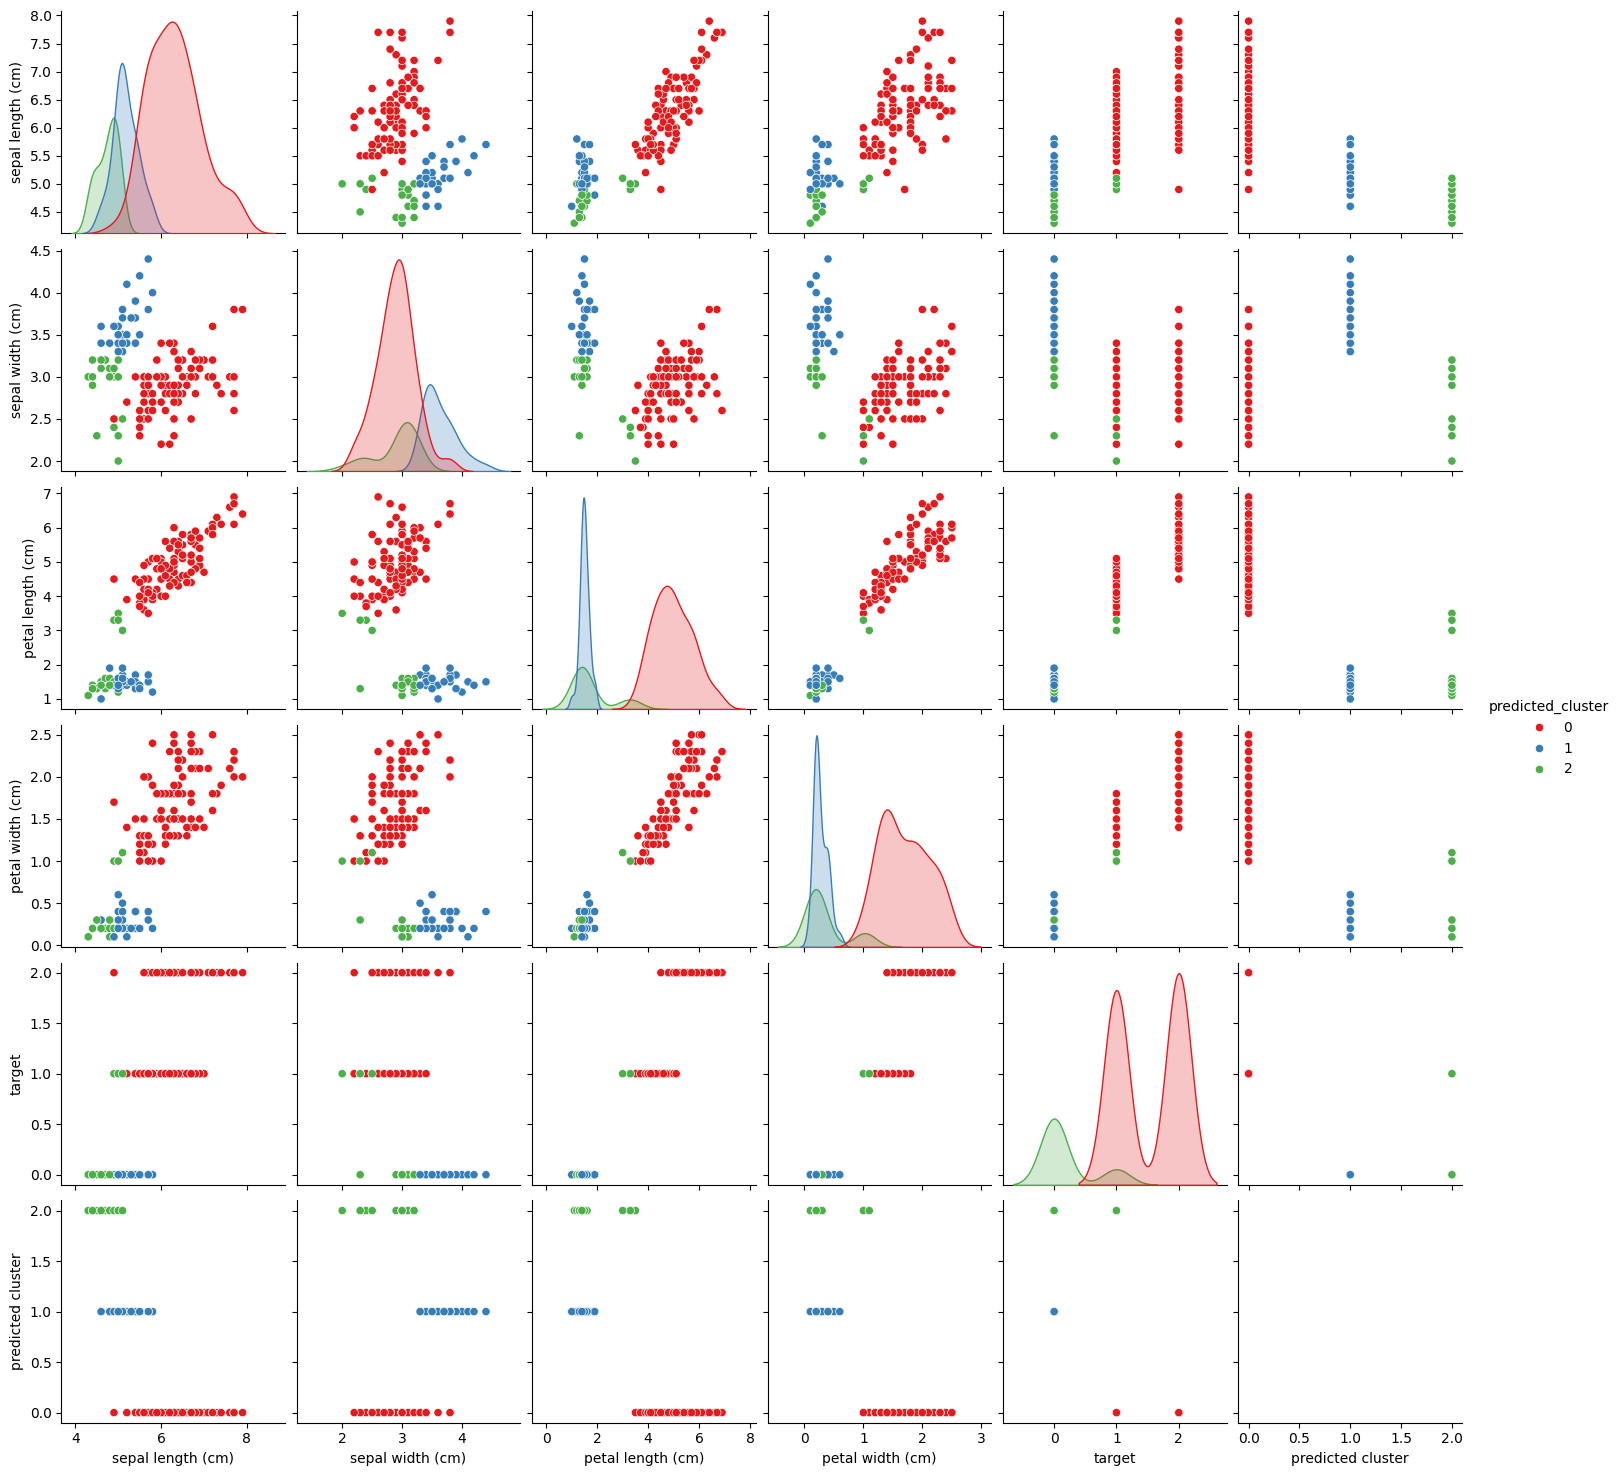

In [35]:
#vizualize the data
sns.pairplot(df,hue="predicted_cluster", palette="Set1")
plt.show()

In [37]:
#hyper parameter tuning
#Elbow method for optimal k
inertia=[]
k_range=range(1,11)

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

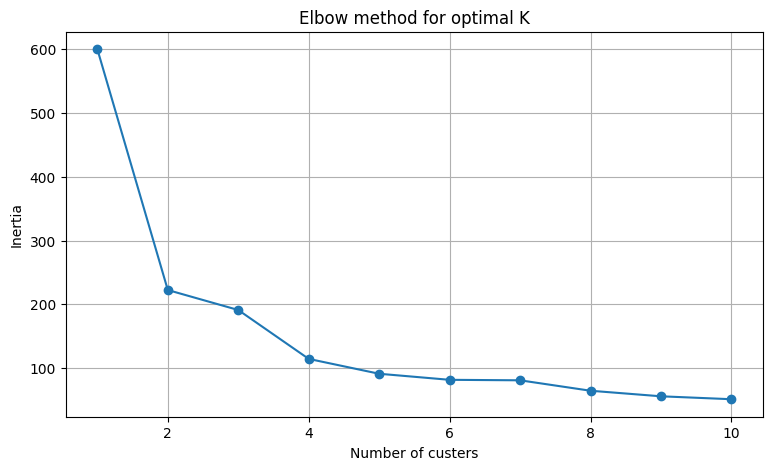

In [43]:
#plotting the elbow graph
plt.figure(figsize=(9,5))
plt.plot(k_range,inertia,marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel("Number of custers")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [44]:
#Model Evaluation
from sklearn.metrics import silhouette_score,adjusted_rand_score

#silhoutte score
sil_score=silhouette_score(x_scaled,y_pred)
print("silhouette score is:",sil_score)

#adjusting ARI
ari=adjusted_rand_score(y,y_pred)
print("adjusted rand index is(ARI):",ari)

silhouette score is: 0.4798814508199817
adjusted rand index is(ARI): 0.432804702527474
